# Tu primer random forest con scikit-learn

In [11]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Adult Data Set ( Census Income dataset)** de Kaggle: https://www.kaggle.com/datasets/kritidoneria/adultdatasetxai

In [12]:
#Cargamos dataset a utilizar
df_data = pd.read_csv("./Datasets/Adult_Data.csv", sep = ",")

In [13]:
df_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Exploración de datos

In [14]:
col_names = ['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'ethnicity', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'loan', 'native-country']
df_data.columns = col_names

In [22]:
#Visualizacion del dataframe
df_data.sample(5)

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,ethnicity,gender,capital-gain,capital-loss,hours-per-week,loan,native-country
2825,35,State-gov,140752,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
9071,37,Self-emp-not-inc,268598,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Other,Male,7298,0,50,Puerto-Rico,>50K
12234,42,Private,183319,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,El-Salvador,<=50K
2201,55,Private,227158,Bachelors,13,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
13872,57,Private,108741,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

>50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, - - - - - - - Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [17]:
#Analizamos el shape del objeto
print(df_data.shape)

(32560, 15)


In [20]:
df_data.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
ethnicity         0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
loan              0
native-country    0
dtype: int64

In [18]:
#Visualizamos los tipos de datos
df_data.dtypes

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
ethnicity         object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
loan              object
native-country    object
dtype: object

In [45]:
categorical_cols = ["gender", "workclass", "education", "education-num", "marital-status", "occupation", "relationship", "ethnicity", "loan", "native-country"]

In [46]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce #pip install category-encoders

encoder = ce.OrdinalEncoder(cols = categorical_cols)

df_data = encoder.fit_transform(df_data)



In [48]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   workclass       32560 non-null  int32
 2   fnlwgt          32560 non-null  int64
 3   education       32560 non-null  int32
 4   education-num   32560 non-null  int32
 5   marital-status  32560 non-null  int32
 6   occupation      32560 non-null  int32
 7   relationship    32560 non-null  int32
 8   ethnicity       32560 non-null  int32
 9   gender          32560 non-null  int32
 10  capital-gain    32560 non-null  int64
 11  capital-loss    32560 non-null  int64
 12  hours-per-week  32560 non-null  int64
 13  loan            32560 non-null  int32
 14  native-country  32560 non-null  int32
dtypes: int32(10), int64(5)
memory usage: 2.5 MB


## Entrenamiento de random forest con scikit-learn

In [49]:
#Separamos en X e y
X = df_data.drop("native-country", axis =1)
y = df_data["native-country"]

In [50]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=00000)

In [51]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=25, random_state=00000)

In [52]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [53]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [54]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.9986398736398736
El accuracy en test es: 0.8521703521703522


In [55]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 9768 entries, 22278 to 26822
Series name: native-country
Non-Null Count  Dtype
--------------  -----
9768 non-null   int32
dtypes: int32(1)
memory usage: 114.5 KB


In [56]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

,feature,importance
2,fnlwgt,0.168375
0,Age,0.154074
10,capital-gain,0.117735
5,marital-status,0.100272
6,occupation,0.090644
12,hours-per-week,0.083640
7,relationship,0.075513
3,education,0.045162
4,education-num,0.043944
1,workclass,0.040764


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'fnlwgt'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'capital-gain'),
  Text(3, 0, 'marital-status'),
  Text(4, 0, 'occupation'),
  Text(5, 0, 'hours-per-week'),
  Text(6, 0, 'relationship'),
  Text(7, 0, 'education'),
  Text(8, 0, 'education-num'),
  Text(9, 0, 'workclass'),
  Text(10, 0, 'capital-loss'),
  Text(11, 0, 'loan'),
  Text(12, 0, 'ethnicity'),
  Text(13, 0, 'gender')])

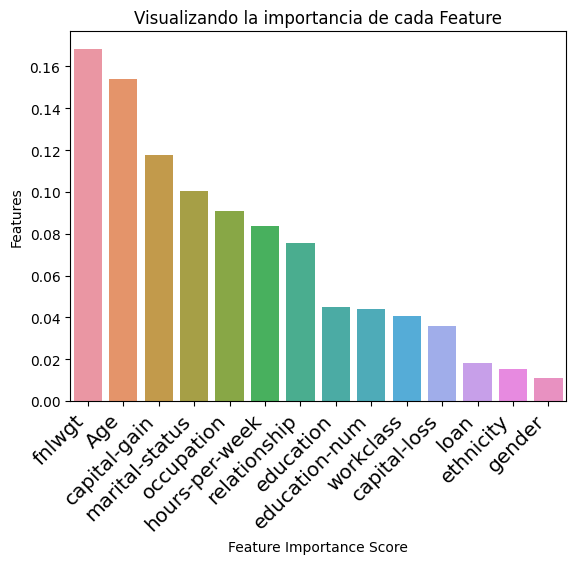

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**

In [61]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

parametros = {
  'n_estimators' : range(4,10),
  'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
  'max_depth' : range(2,11)
  }

rf_grid = GridSearchCV(rf, parametros, cv = 5, scoring='accuracy').fit(X,y)

c:\Users\tote_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tote_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tote_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\tote_\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py"

In [62]:
# mejores parametros
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 9}

In [63]:
# mejor score
rf_grid.best_score_

0.8587530712530713